In [3]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup as BS #BeautifulSoup is a Python library
                                    #for pulling data out of HTML and XML files.

import urllib.request
import urllib.parse
import urllib.error
import ssl
import re
import pandas as pd
import np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import seaborn as sns

def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
address=[]
rent=[]
sch_crime=[]
sugg_income=[]
add1=[]
area=[]
bed=[]
bath=[]
floor=[]
commute=[]
descp=[]
addr_link=[]
urls = ["https://www.trulia.com/for_rent/Oakland,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
         "https://www.trulia.com/for_rent/San_Jose,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
       "https://www.trulia.com/for_rent/San_Francisco,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
       "https://www.trulia.com/for_rent/Sunnyvale,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
       "https://www.trulia.com/for_rent/Berkeley,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
       "https://www.trulia.com/for_rent/Fremont,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
       "https://www.trulia.com/for_rent/Pleasanton,CA/1p_beds/SINGLE-FAMILY_HOME_type/",
       "https://www.trulia.com/for_rent/Livermore,CA/SINGLE-FAMILY_HOME_type/"]


for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'data-testid':'property-price'}): #gets rent
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                rent.append(row)

        #for tag in soup.findAll('div',attrs={'class':'Text__TextBase-sc-1i9uasc-0-div Text__TextContainerBase-sc-1i9uasc-1 lcNNgu'}): #gets add
                #row = tag.get_text()
                #print(row)
                #address.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-region'}): #add1
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                add1.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-street'}): #area code
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                area.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-beds'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                bed.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-baths'}): #bath
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                bath.append(row)
               
        for tag in soup.findAll('div',attrs={'data-testid':'property-floorSpace'}):  #floorsize
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                floor.append(row)
                                           

        links=[]
        for cards in soup.findAll('div',attrs={'class':'Box-sc-8ox7qa-0 jIGxjA PropertyCard__PropertyCardContainer-sc-1ush98q-2 gKJaNz'}):
           
            for link in cards.findAll('a', attrs={'href': re.compile("^/")}):
                links.append("https://www.trulia.com"+link.get('href')) #appends all links in the page
       
        #print(links) # picking up each link and reading inside it
        for link in links:
            addr_link.append(link)
            req = Request(link, headers=get_headers())
            htmlfile = urlopen(req)
            htmltext = htmlfile.read()
            #print (htmltext)
            soup = BS(htmltext,'html.parser')  # Reads inside links
            #print("hello")
           
            for tag in soup.findAll('div',attrs={'aria-label':'Crime'}):  # crime
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                sch_crime.append(row)
           
            for tag in soup.findAll('span',attrs={'class':'Text__TextBase-sc-1i9uasc-0 fOuqJu'}): # finds suggested income
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                sugg_income.append(row)
               
            for tag in soup.findAll('div',attrs={'data-testid':'explore-the-area-commuteTab'}): #commute
                row = tag.get_text()
                if not row:
                    row="NA"
                print(row)
                commute.append(row) #commute
             
            for tag in soup.findAll('div',attrs={'data-testid':'seo-description-paragraph'}): #descp
                row = tag.get_text()

                print(row)
                descp.append(row) #commute
             
            # add more code here
        count=count+1
        page=str(count)+"_p"  # changes page,will go till page 4,total 120 links per city
        x=y+page
data_frame = pd.DataFrame(list(zip(add1,area,rent,bed,bath,floor,descp,commute,sch_crime,sugg_income,addr_link)),columns=["Address","Location","Rent","Bed","Bath","Size","Description","Commute","Crime","Income","URL"])
data_frame


https://www.trulia.com/for_rent/Oakland,CA/1p_beds/SINGLE-FAMILY_HOME_type/
$2,400/mo
$1,700/mo
$1,800/mo
$2,400/mo
$3,199/mo
$2,950/mo
$2,950/mo
$3,975/mo
$3,200/mo
$3,600/mo
$2,200/mo
$2,799/mo
$3,400/mo
$2,850/mo
$3,800/mo
$3,000/mo
$2,950/mo
$4,250/mo
$3,000/mo
$3,900/mo
$2,690/mo
$2,550/mo
$1,650/mo
$2,650/mo
$3,000/mo
$2,400/mo
$3,500/mo
$2,200/mo
$4,900/mo
$2,400/mo
Produce & Waterfront, Oakland, CA
Prescott, Oakland, CA
Upper Laurel, Oakland, CA
Clinton, Oakland, CA
Clawson, Oakland, CA
Hoover/Foster, Oakland, CA
Tuxedo, Oakland, CA
Montclair, Oakland, CA
Santa Fe, Oakland, CA
Pill Hill, Oakland, CA
Allendale, Oakland, CA
Jefferson, Oakland, CA
Longfellow, Oakland, CA
Shafter, Oakland, CA
Forestland, Oakland, CA
Patten, Oakland, CA
Seminary, Oakland, CA
Forestland, Oakland, CA
Hegenberger, Oakland, CA
Crestmont, Oakland, CA
Havenscourt, Oakland, CA
Webster, Oakland, CA
Frick, Oakland, CA
Lynn, Oakland, CA
Jefferson, Oakland, CA
Elmhurst Park, Oakland, CA
Millsmont, Oakland, CA


,Address,Location,Rent,Bed,Bath,Size,Description,Commute,Crime,Income,URL
0,"Produce & Waterfront, Oakland, CA",321 Castro St,"$2,400/mo",3bd,1ba,900 sqft,"321 Castro St, Oakland, CA is a 3 bedroom, 1 b...",Commute60% of residents commute by car.,CrimeLow crime relative to the rest of Alameda...,"$86,400",https://www.trulia.com/p/ca/oakland/321-castro...
1,"Prescott, Oakland, CA",1687 8th St,"$1,700/mo",1bd,1ba,450 sqft,"1687 8th St, Oakland, CA is a 1 bedroom, 1 bat...",Commute60% of residents commute by car.,CrimeHigh crime relative to the rest of Alamed...,"$61,200",https://www.trulia.com/p/ca/oakland/1687-8th-s...
2,"Upper Laurel, Oakland, CA",Address Not Disclosed,"$1,800/mo",2bd,1ba,700 sqft,"This home in Oakland, CA is a 2 bedroom, 1 bat...",Commute85% of residents commute by car.,CrimeLowest crime relative to the rest of Alam...,"$64,800",https://www.trulia.com/p/ca/oakland/address-no...
3,"Clinton, Oakland, CA",2243 12th Ave,"$2,400/mo",2bd,1ba,"1,017 sqft","2243 12th Ave, Oakland, CA is a 2 bedroom, 1 b...",Commute70% of residents commute by car.,CrimeModerate crime relative to the rest of Al...,"$86,400",https://www.trulia.com/p/ca/oakland/2243-12th-...
4,"Clawson, Oakland, CA",1064 30th St,"$3,199/mo",3bd,2ba,"1,100 sqft","1064 30th St, Oakland, CA is a 3 bedroom, 2 ba...",Commute67% of residents commute by car.,CrimeHigh crime relative to the rest of Alamed...,"$115,164",https://www.trulia.com/p/ca/oakland/1064-30th-...
5,"Hoover/Foster, Oakland, CA",692 31st St,"$2,950/mo",2bd,1ba,"1,000 sqft","692 31st St, Oakland, CA is a 2 bedroom, 1 bat...",Commute58% of residents commute by car.,CrimeHigh crime relative to the rest of Alamed...,"$106,200",https://www.trulia.com/p/ca/oakland/692-31st-s...
6,"Tuxedo, Oakland, CA",2215 E 29th St,"$2,950/mo",3bd,1ba,"1,300 sqft","2215 E 29th St, Oakland, CA is a 3 bedroom, 1 ...",Commute70% of residents commute by car.,CrimeLow crime relative to the rest of Alameda...,"$106,200",https://www.trulia.com/p/ca/oakland/2215-e-29t...
7,"Montclair, Oakland, CA",2185 Trafalgar Pl,"$3,975/mo",3bd,2ba,"1,000 sqft","2185 Trafalgar Pl, Oakland, CA is a 3 bedroom,...",Commute79% of residents commute by car.,CrimeLowest crime relative to the rest of Alam...,"$143,100",https://www.trulia.com/p/ca/oakland/2185-trafa...
8,"Santa Fe, Oakland, CA",843 60th St,"$3,200/mo",3bd,1ba,950 sqft,"843 60th St, Oakland, CA is a 3 bedroom, 1 bat...",Commute67% of residents commute by car.,CrimeLow crime relative to the rest of Alameda...,"$115,200",https://www.trulia.com/p/ca/oakland/843-60th-s...
9,"Pill Hill, Oakland, CA",32nd St,"$3,600/mo",4bd,2.5ba,912 sqft,"32nd St, Oakland, CA is a 4 bedroom, 2.5 bathr...",Commute58% of residents commute by car.,CrimeModerate crime relative to the rest of Al...,"$129,600",https://www.trulia.com/p/ca/oakland/0-32nd-st-...


In [4]:
#Save the obtained dataframe to csv
data_frame.to_csv('SFBayArea_Rental.csv')

In [1]:
#import csv
import pandas as pd
import re
df = pd.read_csv('SFBayArea_Rental.csv') 
df.head(5)

,Unnamed: 0,Address,Location,Rent,Bed,Bath,Size,Description,Commute,Crime,Income,URL
0,0,"Produce & Waterfront, Oakland, CA",321 Castro St,"$2,400/mo",3bd,1ba,900 sqft,"321 Castro St, Oakland, CA is a 3 bedroom, 1 b...",Commute60% of residents commute by car.,CrimeLow crime relative to the rest of Alameda...,"$86,400",https://www.trulia.com/p/ca/oakland/321-castro...
1,1,"Prescott, Oakland, CA",1687 8th St,"$1,700/mo",1bd,1ba,450 sqft,"1687 8th St, Oakland, CA is a 1 bedroom, 1 bat...",Commute60% of residents commute by car.,CrimeHigh crime relative to the rest of Alamed...,"$61,200",https://www.trulia.com/p/ca/oakland/1687-8th-s...
2,2,"Upper Laurel, Oakland, CA",Address Not Disclosed,"$1,800/mo",2bd,1ba,700 sqft,"This home in Oakland, CA is a 2 bedroom, 1 bat...",Commute85% of residents commute by car.,CrimeLowest crime relative to the rest of Alam...,"$64,800",https://www.trulia.com/p/ca/oakland/address-no...
3,3,"Clinton, Oakland, CA",2243 12th Ave,"$2,400/mo",2bd,1ba,"1,017 sqft","2243 12th Ave, Oakland, CA is a 2 bedroom, 1 b...",Commute70% of residents commute by car.,CrimeModerate crime relative to the rest of Al...,"$86,400",https://www.trulia.com/p/ca/oakland/2243-12th-...
4,4,"Clawson, Oakland, CA",1064 30th St,"$3,199/mo",3bd,2ba,"1,100 sqft","1064 30th St, Oakland, CA is a 3 bedroom, 2 ba...",Commute67% of residents commute by car.,CrimeHigh crime relative to the rest of Alamed...,"$115,164",https://www.trulia.com/p/ca/oakland/1064-30th-...


In [8]:
#Pre-processing of data - Stage 1
df['Rent'] = df['Rent'].map(lambda x: x.lstrip('$').rstrip('/mo?')).str.replace(",","").astype(float)
df['Bed'] = df['Bed'].map(lambda x: x.lstrip('bd').rstrip('bds')).astype(float)
df['Bath'] = df['Bath'].map(lambda x: x.lstrip('ba').rstrip('AaBbCc')).astype(float)
df['Size'] = df['Size'].map(lambda x: x.lstrip('sf').rstrip('sqft')).str.replace(",","").astype(float)
df[' Income'] = df['Income'].map(lambda x: x.lstrip('$').rstrip('AaBbCc')).str.replace(",","").astype(float)
df['Commute']  = df.Commute.str.extract('(\d+)').astype(float)
df['Crime']  = df.Crime.str.extract('^(.*?)(?=[ ])')
df2 = df["Address"].apply(lambda x: x.split(","))
df['City'] = df2.apply(lambda x: " ".join(x[-2].split()[:]))

In [9]:
#Checking missing values 
df.isnull().sum()

Unnamed: 0     0
Address        0
Location       0
Rent           0
Bed            0
Bath           0
Size           0
Description    0
Commute        0
Crime          0
Income         0
URL            0
 Income        0
City           0
dtype: int64

In [10]:
#Checkng duplicate rows 
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Unnamed: 0, Address, Location, Rent, Bed, Bath, Size, Description, Commute, Crime, Income, URL,  Income, City]
Index: []


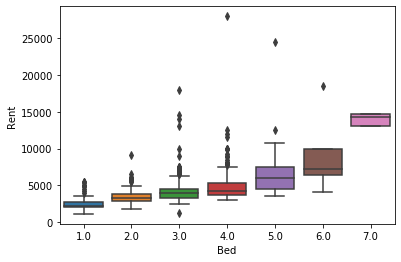

In [11]:
#checking Outliers 
import seaborn as sns
sns.boxplot(x="Bed", y="Rent",data=df);

In [7]:
#Preprocessing Data - stage 2
#to remove records that capture few data from border of cities 
df = df.groupby("City").filter(lambda x : len(x)>5)

In [59]:
import numpy as np
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df = df.reindex(list(np.arange(1,809,1)))
df.head()

,Index,Address,Location,Rent,Bed,Bath,Size,Description,Commute,Crime,Income,URL,Commute Percentage,Income,City
1,1.0,"Prescott, Oakland, CA",1687 8th St,1700.0,1.0,1.0,450.0,"1687 8th St, Oakland, CA is a 1 bedroom, 1 bat...",Commute60% of residents commute by car.,CrimeHigh,"$61,200",https://www.trulia.com/p/ca/oakland/1687-8th-s...,60.0,61200.0,Oakland
2,2.0,"Upper Laurel, Oakland, CA",Address Not Disclosed,1800.0,2.0,1.0,700.0,"This home in Oakland, CA is a 2 bedroom, 1 bat...",Commute85% of residents commute by car.,CrimeLowest,"$64,800",https://www.trulia.com/p/ca/oakland/address-no...,85.0,64800.0,Oakland
3,3.0,"Clinton, Oakland, CA",2243 12th Ave,2400.0,2.0,1.0,1017.0,"2243 12th Ave, Oakland, CA is a 2 bedroom, 1 b...",Commute70% of residents commute by car.,CrimeModerate,"$86,400",https://www.trulia.com/p/ca/oakland/2243-12th-...,70.0,86400.0,Oakland
4,4.0,"Clawson, Oakland, CA",1064 30th St,3199.0,3.0,2.0,1100.0,"1064 30th St, Oakland, CA is a 3 bedroom, 2 ba...",Commute67% of residents commute by car.,CrimeHigh,"$115,164",https://www.trulia.com/p/ca/oakland/1064-30th-...,67.0,115164.0,Oakland
5,5.0,"Hoover/Foster, Oakland, CA",692 31st St,2950.0,2.0,1.0,1000.0,"692 31st St, Oakland, CA is a 2 bedroom, 1 bat...",Commute58% of residents commute by car.,CrimeHigh,"$106,200",https://www.trulia.com/p/ca/oakland/692-31st-s...,58.0,106200.0,Oakland


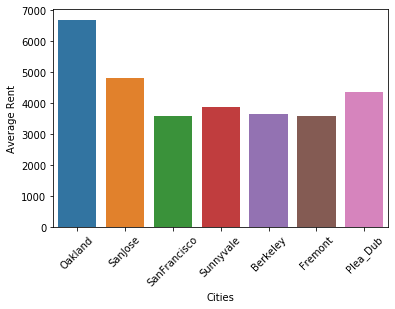

In [74]:
# Which is the most affordable city in Bay area?
import matplotlib.pyplot as plt
Rent= df[['Rent','Bed']]
Rent
Rent.mean()

Oakland= Rent[0:120]
Oakland
Col1= Oakland.loc[:,"Rent"].mean()

SanJose= Rent[120:240]
SanJose
Col2=SanJose.loc[:,"Rent"].mean()

SanFrancisco= Rent[240:360]
SanFrancisco
Col3=SanFrancisco.loc[:,"Rent"].mean()

Sunnyvale= Rent[360:469]
Sunnyvale
Col4=Sunnyvale.loc[:,"Rent"].mean()

Berkeley= Rent[469:571]
Berkeley
Col5=Berkeley.loc[:,"Rent"].mean()

Fremont= Rent[571:687]
Fremont
Col6=Fremont.loc[:,"Rent"].mean()

Plea_Dub= Rent[687:809]
Plea_Dub
Col7=Plea_Dub.loc[:,"Rent"].mean()



dff=pd.DataFrame({'Cities':['Oakland','SanJose','SanFrancisco','Sunnyvale','Berkeley','Fremont','Plea_Dub'],
                   'Average Rent':[Col1,Col2,Col3,Col4,Col5,Col6,Col7]})
                  
sns.barplot(x='Cities',y='Average Rent',data=dff)
plt.xticks(rotation=45)
plt.show()


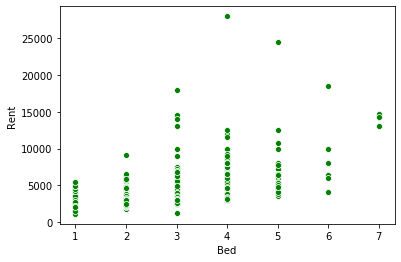

In [11]:
Rent1= df[['Rent','Bed']]
Rent1
sns.scatterplot(x='Bed', y='Rent',color ='g', data=Rent1)
plt.show()

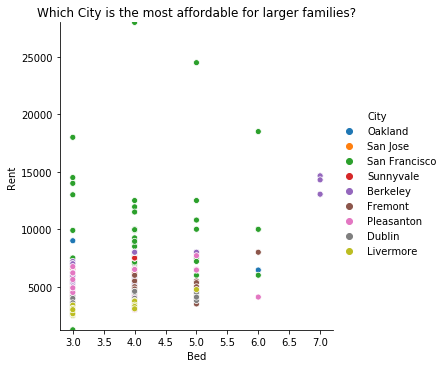

In [13]:
# Which is the most affordable city for larger family homes ?

large_family=df['Bed'] >=3
df_large_family=df[large_family] # df creation

sns.relplot(x='Bed',y='Rent',hue='City',data=df_large_family)
plt.ylim(df_large_family['Rent'].min(),df_large_family['Rent'].max())
plt.title('Which City is the most affordable for larger families?')
plt.show()

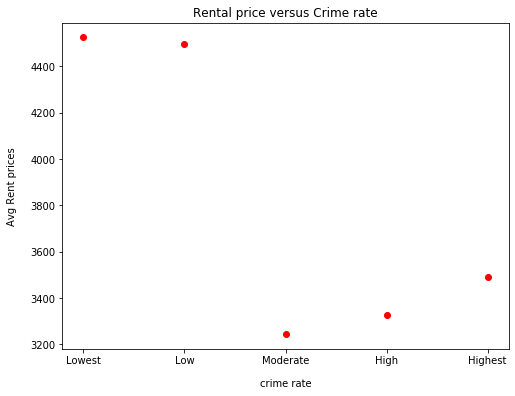

In [77]:
#How Crime impact Rental Prices?
pd.options.mode.chained_assignment = None
Low = df[df['Crime'].str.contains('CrimeLow', case=False)]
Low_mean = Low["Rent"].mean()

Lowest = df[df['Crime'].str.contains('Lowest', case=False)]
Lowest_mean = Lowest["Rent"].mean()

Moderate = df[df['Crime'].str.contains('moderate', case=False)]
Moderate_mean = Moderate["Rent"].mean()

High = df[df['Crime'].str.contains('CrimeHigh', case=False)]
High_mean = High["Rent"].mean()

Highest = df[df['Crime'].str.contains('Highest', case=False)]
Highest_mean = Highest["Rent"].mean()

import matplotlib.pyplot as plt
x=["Lowest", "Low", "Moderate", "High", "Highest"]
y = [Lowest_mean, Low_mean, Moderate_mean, High_mean,Highest_mean]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red')
plt.xlabel("crime rate", labelpad=13)
plt.ylabel("Avg Rent prices", labelpad=13)
plt.title("Rental price versus Crime rate")
plt.show()


CrimeLowest      613
CrimeLow         123
CrimeModerate     40
CrimeHigh         20
CrimeHighest       8
Name: Crime, dtype: int64


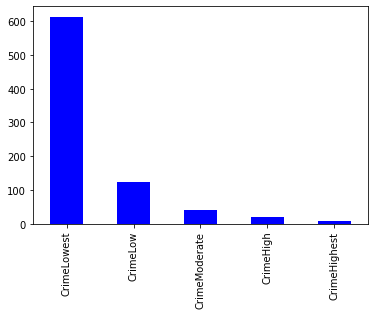

In [14]:
#Is Bayarea safe to live ?
Crime_Value = df['Crime']
print(Crime_Value.value_counts())

Series=Crime_Value.value_counts() 
Series.plot(kind="bar",color='b')

plt.show()

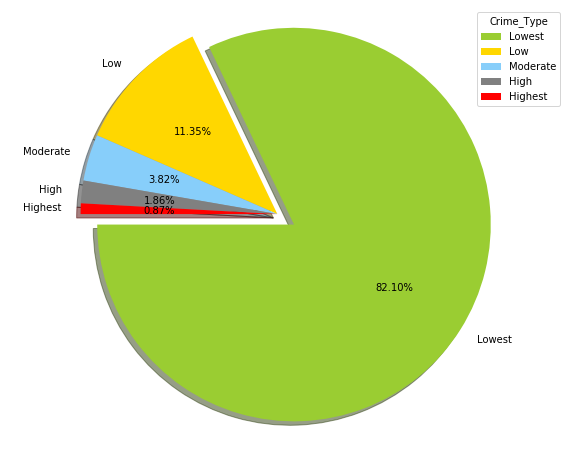

In [15]:
labels = 'Lowest', 'Low', 'Moderate', 'High','Highest'
A = [752, 104, 35, 17, 8]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'grey','red']
explode = (0.1, 0, 0, 0, 0) 
plt.figure(figsize=(10,8))
plt.pie(A, explode=explode, labels=labels, colors=colors,
        autopct='%.2f%%', pctdistance = 0.6, shadow=True, startangle=180, frame = False)
plt.axis('equal')
plt.legend(title="Crime_Type", loc = 'upper right')
plt.show()
#plt.savefig('crime_piechart1.png',dpi=300)

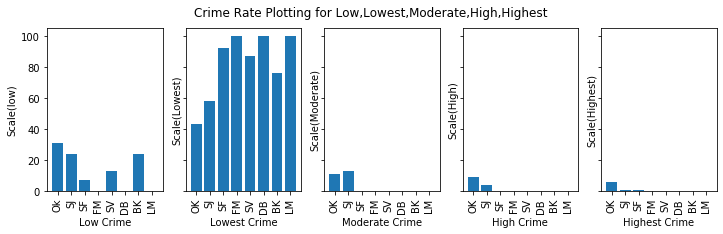

In [18]:
#Crime Rate Plotting for Low,Lowest,Moderate,High,Highest
data = {'Ok':31, 'SJ':24, 'SF':7, 'FM':0, 'SV':13, 'DB':0,'BK':24,'LM':0}
names = list(data.keys())
values = list(data.values())

data1 = {'OK':43, 'SJ':58, 'SF':92, 'FM':100, 'SV':87, 'DB':100,'BK':76,'LM':100}
names1 = list(data1.keys())
values1 = list(data1.values())

data2 = {'OK':11, 'SJ':13, 'SF':0, 'FM':0, 'SV':0, 'DB':0,'BK':0,'LM':0}
names2 = list(data2.keys())
values2 = list(data2.values())

data3 = {'OK':9, 'SJ':4, 'SF':0, 'FM':0, 'SV':0, 'DB':0,'BK':0,'LM':0}
names3 = list(data3.keys())
values3 = list(data3.values())

data4 = {'OK':6, 'SJ':1, 'SF':1, 'FM':0, 'SV':0, 'DB':0,'BK':0,'LM':0}
names4 = list(data4.keys())
values4 = list(data4.values())


fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)#Adjusting
#figure size and sharing y-axis. 
axs[0].bar(names, values)
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Scale(low)')
axs[0].set_xlabel('Low Crime')
axs[1].bar(names1, values1)
axs[1].set_xticklabels(names1, rotation=90)
axs[1].set_ylabel('Scale(Lowest)')
axs[1].set_xlabel('Lowest Crime')
axs[2].bar(names2, values2)
axs[2].set_xticklabels(names2, rotation=90)
axs[2].set_ylabel('Scale(Moderate)')
axs[2].set_xlabel('Moderate Crime')
axs[3].bar(names3, values3)
axs[3].set_xticklabels(names3, rotation=90)
axs[3].set_ylabel('Scale(High)')
axs[3].set_xlabel('High Crime')
axs[4].bar(names4, values4)
axs[4].set_xticklabels(names4, rotation=90)
axs[4].set_ylabel('Scale(Highest)')
axs[4].set_xlabel('Highest Crime')
fig.suptitle('Crime Rate Plotting for Low,Lowest,Moderate,High,Highest')
#plt.savefig(' Crime Rate.png',dpi=400)
plt.show()

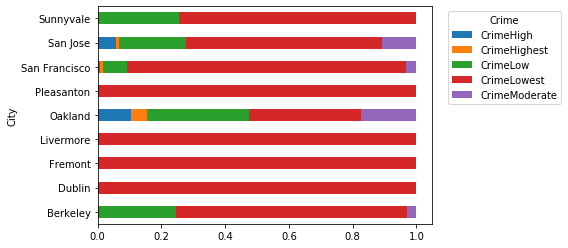

In [19]:
#Which is the Safest City in Bayarea?
crime_city=pd.crosstab(df.City,df.Crime)
crime_norm=crime_city.div(crime_city.sum(1),axis=0)
crime_norm.plot.barh(stacked = 'True')
plt.legend(title = 'Crime',loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

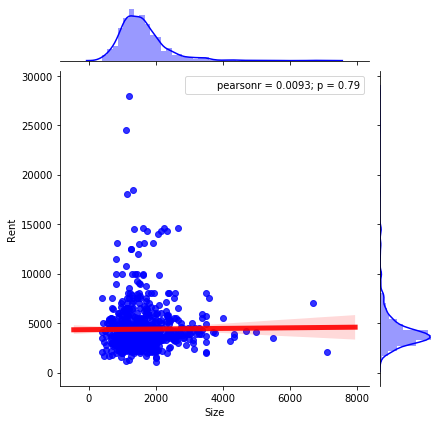

In [75]:
#How Size impact on Rental Price ?
sns.jointplot(x='Size', y= 'Rent',kind='reg', data=df, color ='b',line_kws={"color":"r","alpha":0.9,"lw":5}, stat_func= pearsonr, )
#plt.title('Pearson Correlation: Rental Vs Size ')
plt.show()

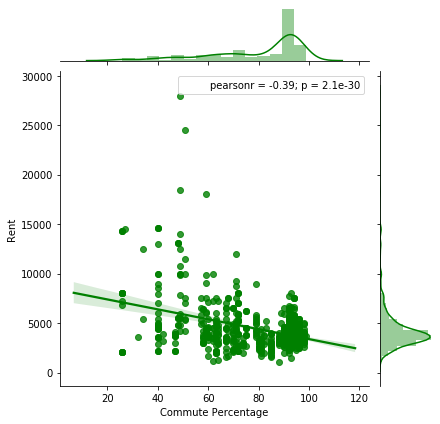

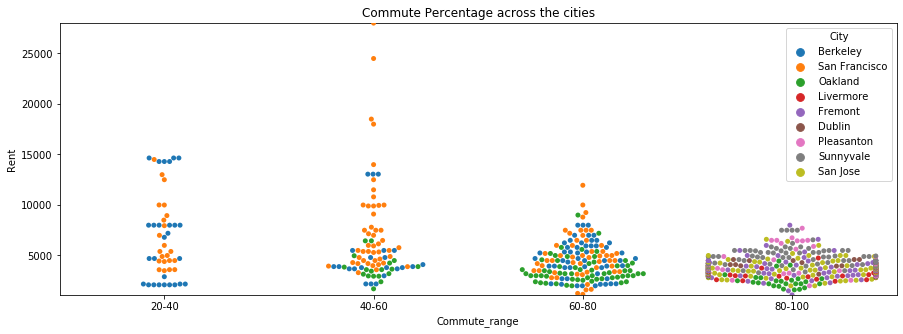

In [72]:
#Does Rental Price increase if an area is more car dependent?
sns.jointplot(x='Commute Percentage',y='Rent',kind='reg',stat_func=pearsonr,data=df,color='g')
plt.show()


def func(x):
    if 20 < x <= 40:
        return '20-40'
    elif 40 < x <= 60:
        return '40-60'
    elif 60 < x <=80:
        return '60-80'
    elif 80 < x <=100:
        return '80-100'
    
df['Commute_range'] = df['Commute Percentage'].apply(func)
df=df.sort_values('Commute_range')    
plt.figure(figsize = (15,5))
sns.swarmplot(x="Commute_range",y="Rent",hue="City",data=df)
plt.ylim(df['Rent'].min(),df['Rent'].max())
plt.title('Commute Percentage across the cities')
plt.show()